<a href="https://colab.research.google.com/github/BelideSaiTeja/Compressive-Strength-of-Concrete/blob/main/Compressive_Strength_of_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

In this Machine Larning Project, Dataset is collected from kaggle (https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set) and will be using Machine Learning Algorithms to make prediction of the Compressive Strength of Concrete from known quantity of different components.

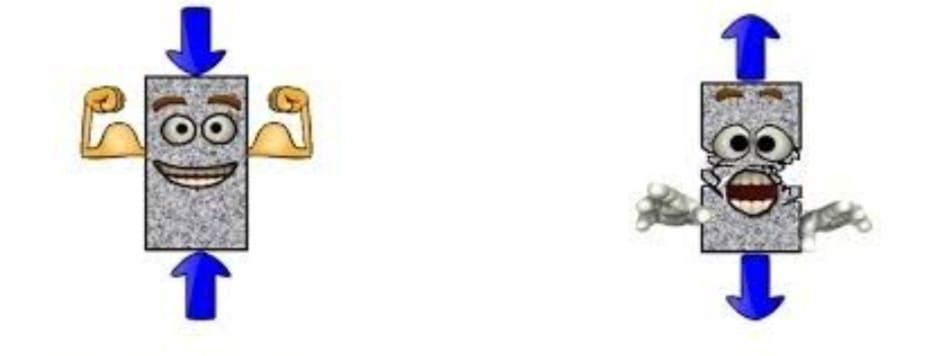

**Importing the required libraries**

First importing all the necessary libraries that will be used in this project. Libraries such as <code>numpy</code> and <code>pandas</code> are used to start with. For visualization, <code>pyplot</code> subpackage of <code>matplotlib</code>, <code>rcParams</code> to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, <code>sklearn</code> library is used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
import itertools
%matplotlib inline

For processing the data, few libraries are imported. To split the availabe dataset for testing and training data, <code>train_test_split</code> method is used.

In [2]:
from sklearn.model_selection import train_test_split

Importing the Machine Learning Algorithms <code>LinearRegression</code>, <code>DecisionTreeRegressor</code>, <code>RandomForestRegressor</code>, <code>GradientBoostingRegressor</code>, <code>AdaBoostRegressor</code>, <code>BaggingRegressor</code> that will be used in the project. To verify the accuracy of the predicted model, <code>accuracy_score</code>, <code>zscore</code>, <code>cross_val_score</code> is imported from standard library.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

**Import Dataset**

All the necessary libraries are imported, now import the dataset and take a look at it. The dataset is stored in <code>concrete_data.csv</code>. Using the pandas <code>read_csv</code> method to read the dataset.

In [4]:
data = pd.read_csv('/content/concrete_data.csv')

The dataset is loaded into the variable data.Taking a glimpse of the data using the <code>head()</code>, <code>tail()</code>, <code>sample()</code>, <code>shape</code>, <code>describe()</code> and <code>info()</code>.

In [5]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [7]:
data.sample(n = 5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
244,238.1,0.0,94.1,186.7,7.0,949.9,847.0,3,19.93
518,202.0,11.0,141.0,206.0,1.7,942.0,801.0,56,23.25
804,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,39.58
578,193.5,290.2,0.0,185.7,0.0,998.2,704.3,7,17.20


In [8]:
data.shape

(1030, 9)

In [9]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

**Data pre-processing**

After exploring the dataset, there is a need to alter some of the column names. The <code>rename()</code> method is used to change the column names.

In [13]:
data = data.rename(columns = {'cement' : 'cement',
    'blast_furnace_slag' : 'slag',
    'fly_ash' : 'ash',
    'water' : 'water',
    'superplasticizer' : 'superplastic',
    'coarse_aggregate' : 'coarseagg',
    'age' : 'age',
    'concrete_compressive_strength' : 'strength'})

In [14]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fine_aggregate ', 'age', 'strength'],
      dtype='object')

Checking for any missing values in the dataset. If possible, missing values will be filled else alternate approach is followed to make data consistent and free from noisy in the data. <code>isnull()</code> method is used to find missing data in the dataset.

In [15]:
data.isnull()

,cement,slag,ash,water,superplastic,coarseagg,fine_aggregate,age,strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

cement             0
slag               0
ash                0
water              0
superplastic       0
coarseagg          0
fine_aggregate     0
age                0
strength           0
dtype: int64

**VISUALIZING DATA**

Visualizations are done to better understand the data and looking to do further process.

Scatterplot and barplot is plotted for cement against strength, to draw some useful outcomes.

Text(0, 0.5, 'Concrete compressive strength (MPa)')

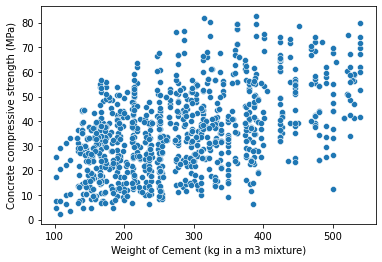

In [17]:
sns.scatterplot(x = data['cement'], y = data['strength'])
plt.xlabel('Weight of Cement (kg in a m3 mixture)')
plt.ylabel('Concrete compressive strength (MPa)')

Text(0, 0.5, 'Concrete compressive Strength (MPa)')

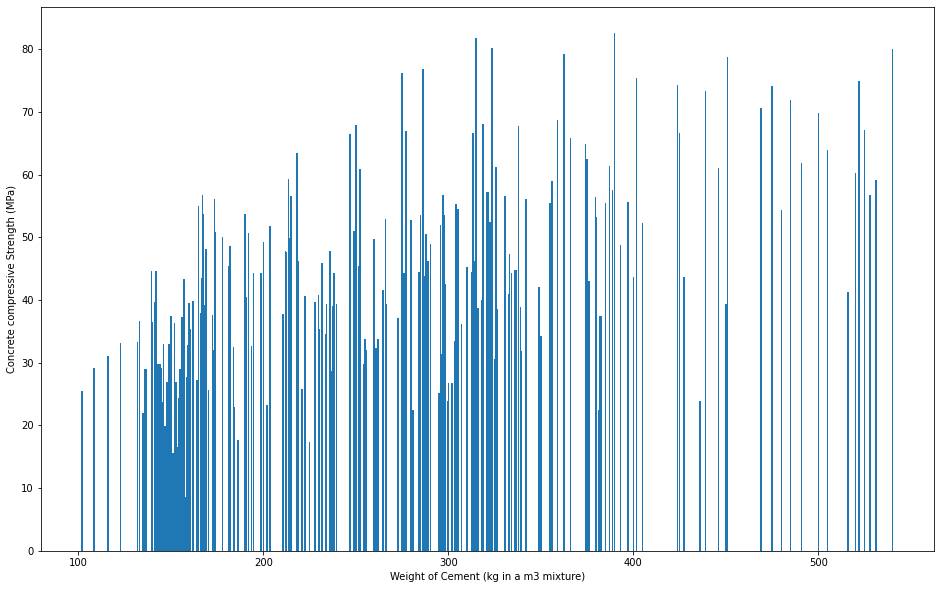

In [18]:
plt.figure(figsize = (16,10))
plt.bar(data.cement, data.strength)
plt.xlabel('Weight of Cement (kg in a m3 mixture)')
plt.ylabel('Concrete compressive Strength (MPa)')

**Observations :**


*   From the scatterplot it is observed that, in the provided data, most amount of data is concentrated around 200-300 kg of cement in a m3 mixture of concrete which provides a strength of around 20-40 MPa.
*   From the barplot it is observed that peak amount of strength of concrete is obtained from cement of 270 - 320 kg and over 500 kg in a m3 mixture which gives around 70 - 80 MPa of maximum strength.



Scatterplot and barplot is plotted for superplasticizer against strength, to draw some useful outcomes.

Text(0, 0.5, 'Concrete compressive strength (MPa)')

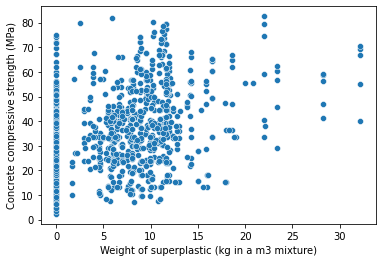

In [19]:
sns.scatterplot(x = data['superplastic'], y = data['strength'])
plt.xlabel('Weight of superplastic (kg in a m3 mixture)')
plt.ylabel('Concrete compressive strength (MPa)')

Text(0, 0.5, 'Concrete compressive Strength (MPa)')

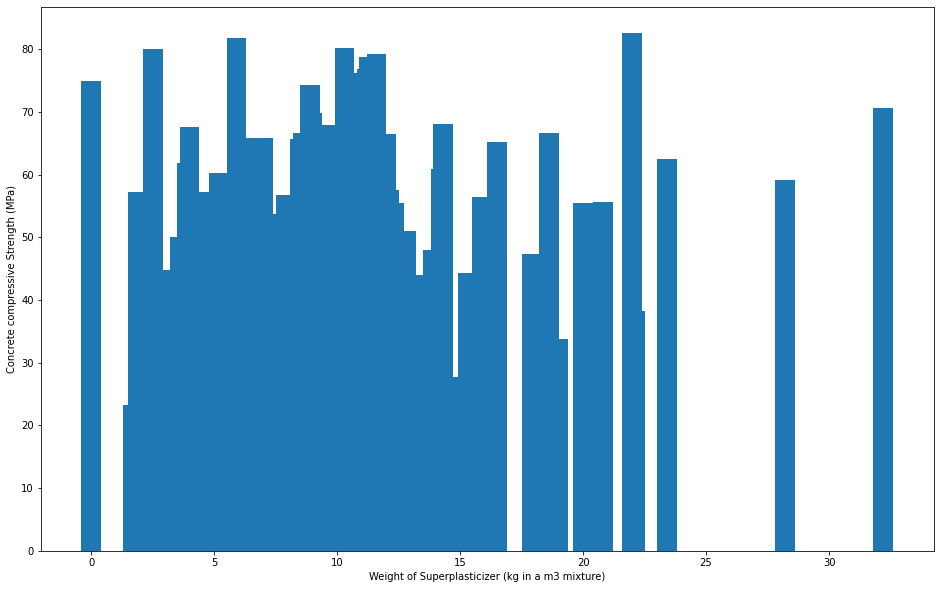

In [20]:
plt.figure(figsize = (16,10))
plt.bar(data.superplastic, data.strength)
plt.xlabel('Weight of Superplasticizer (kg in a m3 mixture)')
plt.ylabel('Concrete compressive Strength (MPa)')

**Observations :**



*   From the scatterplot it is observed that, in the provided data, most amount of data is concentrated around 5 - 10 kg of superplasticizer in a m3 mixture of concrete which provides a strength of around 20-40 MPa.



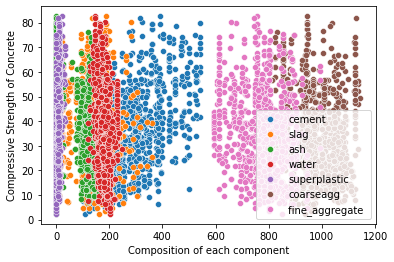

In [21]:
list = [i for i in data.iloc[:,:-1]]
for i in range(7):
  sns.scatterplot(x = data[list[i]], y = data['strength'])
  plt.xlabel('Composition of each component')
  plt.ylabel('Compressive Strength of Concrete')
  plt.legend(list, loc = 'lower right')

In [22]:
x = data.drop(columns = ['strength'])
y = data.strength

In [23]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x,y)

RandomForestRegressor()

In [24]:
sort = rf.feature_importances_.argsort()
sort

array([2, 5, 6, 4, 1, 3, 0, 7])

Text(0.5, 0, 'Component Importance')

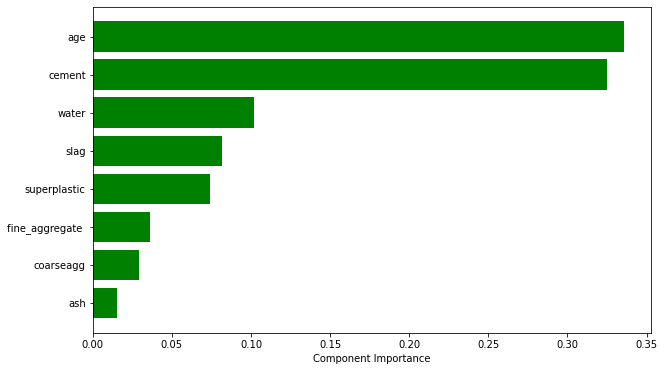

In [25]:
plt.figure(figsize = (10,6))
plt.barh(data.columns[sort], rf.feature_importances_[sort], color = 'green')
plt.xlabel('Component Importance')

**Observation :**

The importance of age of concrete block, amount of cement has high importance in strengthening of concrete, whereas ash, coarse aggregate, fine aggregate has less importance on the strength of concrete relatively. 

**UNIVARIATE ANALYSIS**

CEMENT

In [26]:
print('Range of values: ', data['cement'].max() - data['cement'].min())

Range of values:  438.0


Text(0.5, 1.0, 'cement vs strength')

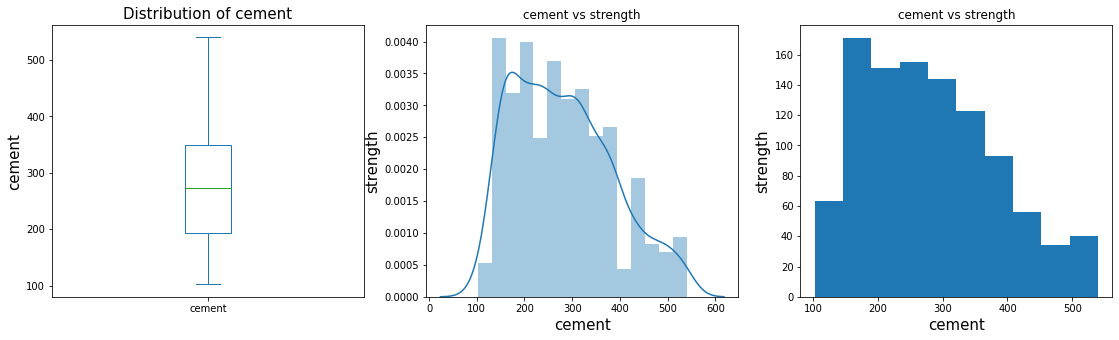

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['cement'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('cement', fontsize = 15)
ax1.set_title('Distribution of cement', fontsize = 15)

# dist plot
sns.distplot(data['cement'], ax = ax2)
ax2.set_xlabel('cement', fontsize = 15)
ax2.set_ylabel('strength', fontsize = 15)
ax2.set_title('cement vs strength')

# histogram plot
ax3.hist(data['cement'])
ax3.set_xlabel('cement', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('cement vs strength')

**Observation :**

Cement is almost normally distributed.

SLAG



In [28]:
print('Range of values: ', data['slag'].max() - data['slag'].min())

Range of values:  359.4


Text(0.5, 1.0, 'slag vs strength')

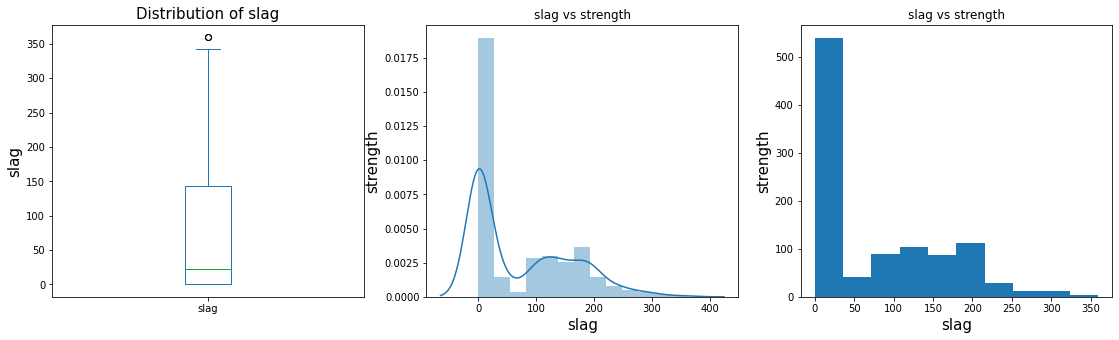

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['slag'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('slag', fontsize = 15)
ax1.set_title('Distribution of slag', fontsize = 15)

# dist plot
sns.distplot(data['slag'], ax = ax2)
ax2.set_xlabel('slag', fontsize = 15)
ax2.set_ylabel('strength', fontsize = 15)
ax2.set_title('slag vs strength')

# histogram plot
ax3.hist(data['slag'])
ax3.set_xlabel('slag', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('slag vs strength')

**Observation :**

Slag has three gausssians and is rightly skewed.

ASH

In [30]:
print('Range of values: ', data['ash'].max() - data['ash'].min())

Range of values:  200.1


Text(0.5, 1.0, 'ash vs strength')

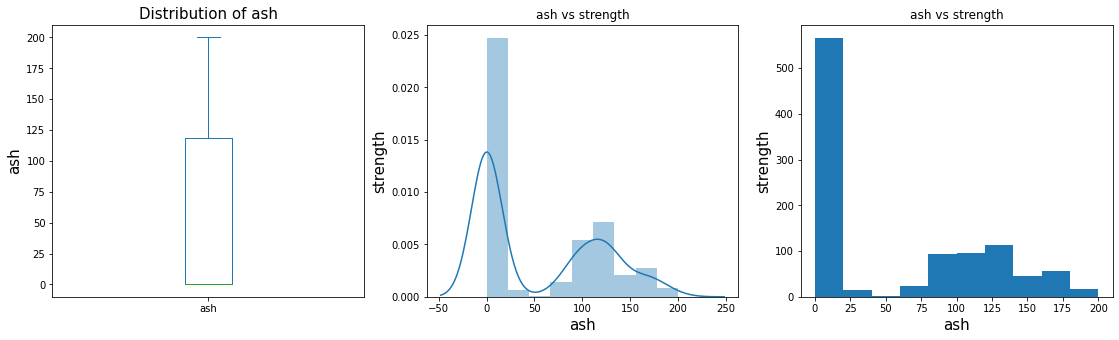

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['ash'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('ash', fontsize = 15)
ax1.set_title('Distribution of ash', fontsize = 15)

# dist plot
sns.distplot(data['ash'], ax = ax2)
ax2.set_xlabel('ash', fontsize = 15)
ax2.set_ylabel('strength', fontsize = 15)
ax2.set_title('ash vs strength')

# histogram plot
ax3.hist(data['ash'])
ax3.set_xlabel('ash', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('ash vs strength')

**Observation :**

Ash has two gaussians and is rightly skewed.

WATER

In [32]:
print('Range of values: ', data['water'].max() - data['water'].min())

Range of values:  125.2


Text(0.5, 1.0, 'water vs strength')

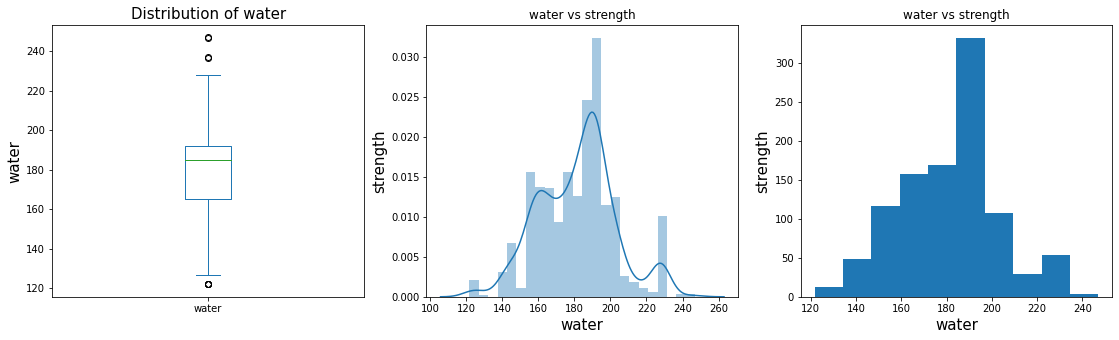

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['water'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('water', fontsize = 15)
ax1.set_title('Distribution of water', fontsize = 15)

# dist plot
sns.distplot(data['water'], ax = ax2)
ax2.set_xlabel('water', fontsize = 15)
ax2.set_ylabel('strength', fontsize = 15)
ax2.set_title('water vs strength')

# histogram plot
ax3.hist(data['water'])
ax3.set_xlabel('water', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('water vs strength')

**Observation :**

Water has three guassians and is slighly left skewed.

SUPER PLASTICIZER

In [34]:
print('Range of values: ', data['superplastic'].max() - data['superplastic'].min())

Range of values:  32.2


Text(0.5, 1.0, 'superplastic vs strength')

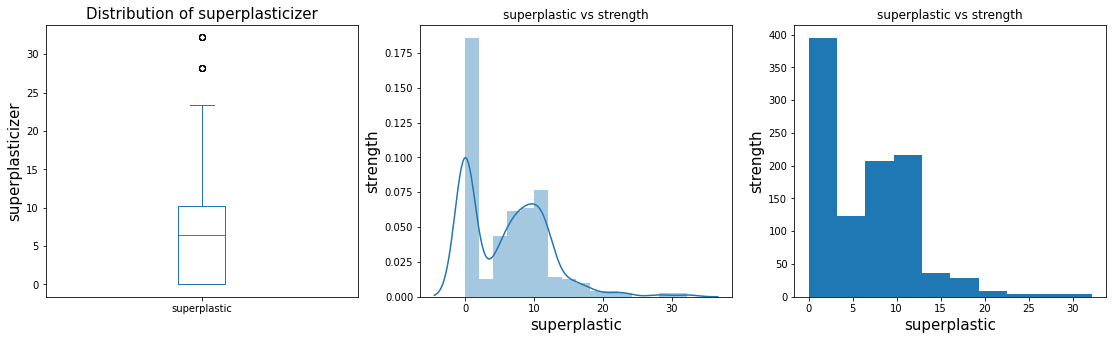

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['superplastic'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('superplasticizer', fontsize = 15)
ax1.set_title('Distribution of superplasticizer', fontsize = 15)

# dist plot
sns.distplot(data['superplastic'], ax = ax2)
ax2.set_xlabel('superplastic', fontsize = 15)
ax2.set_ylabel('strength', fontsize = 15)
ax2.set_title('superplastic vs strength')

# histogram plot
ax3.hist(data['superplastic'])
ax3.set_xlabel('superplastic', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('superplastic vs strength')

**Observation :**

Superplasticizer has two gaussians and is rightly skewed.

COARSE AGGREGATE

In [36]:
print('Range of values: ', data['coarseagg'].max() - data['coarseagg'].min())

Range of values:  344.0


Text(0.5, 1.0, 'coarseagg vs strength')

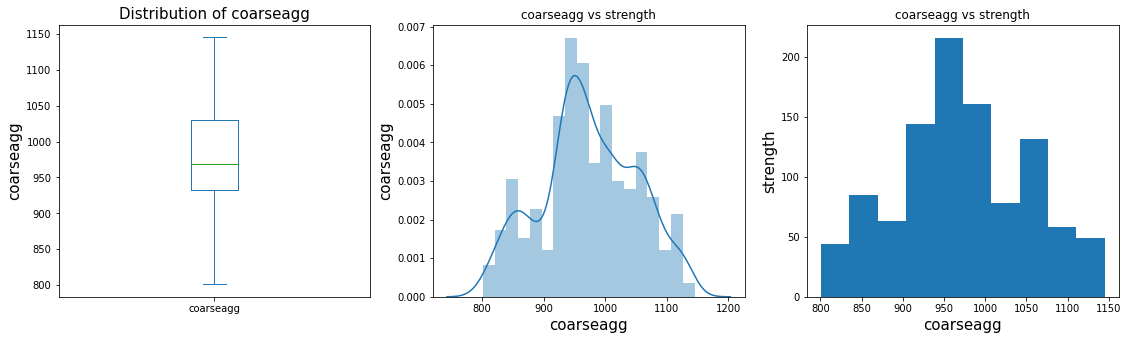

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['coarseagg'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('coarseagg', fontsize = 15)
ax1.set_title('Distribution of coarseagg', fontsize = 15)

# dist plot
sns.distplot(data['coarseagg'], ax = ax2)
ax2.set_xlabel('coarseagg', fontsize = 15)
ax2.set_ylabel('coarseagg', fontsize = 15)
ax2.set_title('coarseagg vs strength')

# histogram plot
ax3.hist(data['coarseagg'])
ax3.set_xlabel('coarseagg', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('coarseagg vs strength')

**Observtion :**

Coarse Aggregate has three guassians and is almost normal.

FINE AGGREGATE

In [38]:
print('Range of values: ', data['fine_aggregate '].max() - data['fine_aggregate '].min())

Range of values:  398.6


Text(0.5, 1.0, 'fine_aggregate  vs strength')

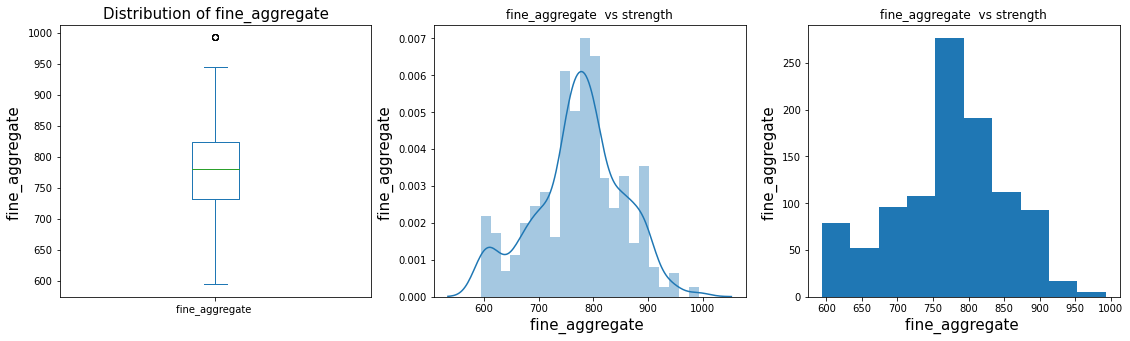

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['fine_aggregate '].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('fine_aggregate ', fontsize = 15)
ax1.set_title('Distribution of fine_aggregate' , fontsize = 15)

# dist plot
sns.distplot(data['fine_aggregate '], ax = ax2)
ax2.set_xlabel('fine_aggregate ', fontsize = 15)
ax2.set_ylabel('fine_aggregate ', fontsize = 15)
ax2.set_title('fine_aggregate  vs strength')

# histogram plot
ax3.hist(data['fine_aggregate '])
ax3.set_xlabel('fine_aggregate ', fontsize = 15)
ax3.set_ylabel('fine_aggregate ', fontsize = 15)
ax3.set_title('fine_aggregate  vs strength')

**Observation :**

Fine Aggregate has almost two guassians and looks like normal.

AGE

In [40]:
print('Range of values: ', data['age'].max() - data['age'].min())

Range of values:  364


Text(0.5, 1.0, 'age vs strength')

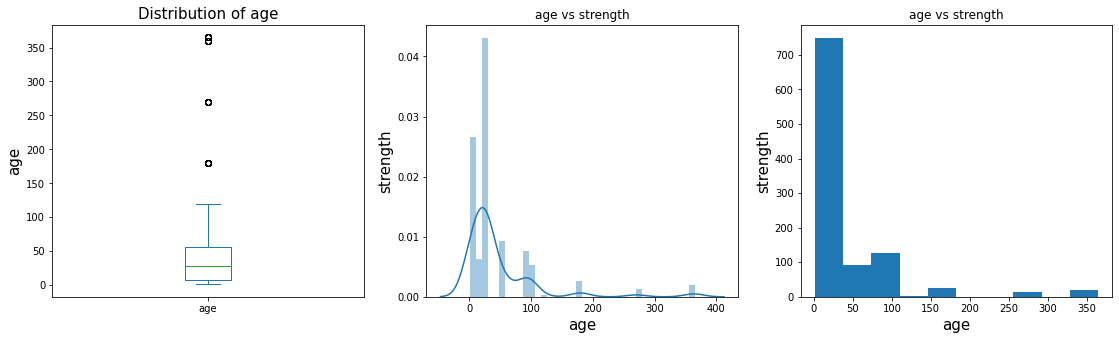

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 5))

# wishker plot
data['age'].plot(kind = 'box', ax = ax1)
ax1.set_ylabel('age', fontsize = 15)
ax1.set_title('Distribution of age', fontsize = 15)

# dist plot
sns.distplot(data['age'], ax = ax2)
ax2.set_xlabel('age', fontsize = 15)
ax2.set_ylabel('strength', fontsize = 15)
ax2.set_title('age vs strength')

# histogram plot
ax3.hist(data['age'])
ax3.set_xlabel('age', fontsize = 15)
ax3.set_ylabel('strength', fontsize = 15)
ax3.set_title('age vs strength')

**Observations :**

Age has multiple guassians and is rightly skewed.

**MULTI VARIATE ANALYSIS**

<AxesSubplot:xlabel='strength', ylabel='Density'>

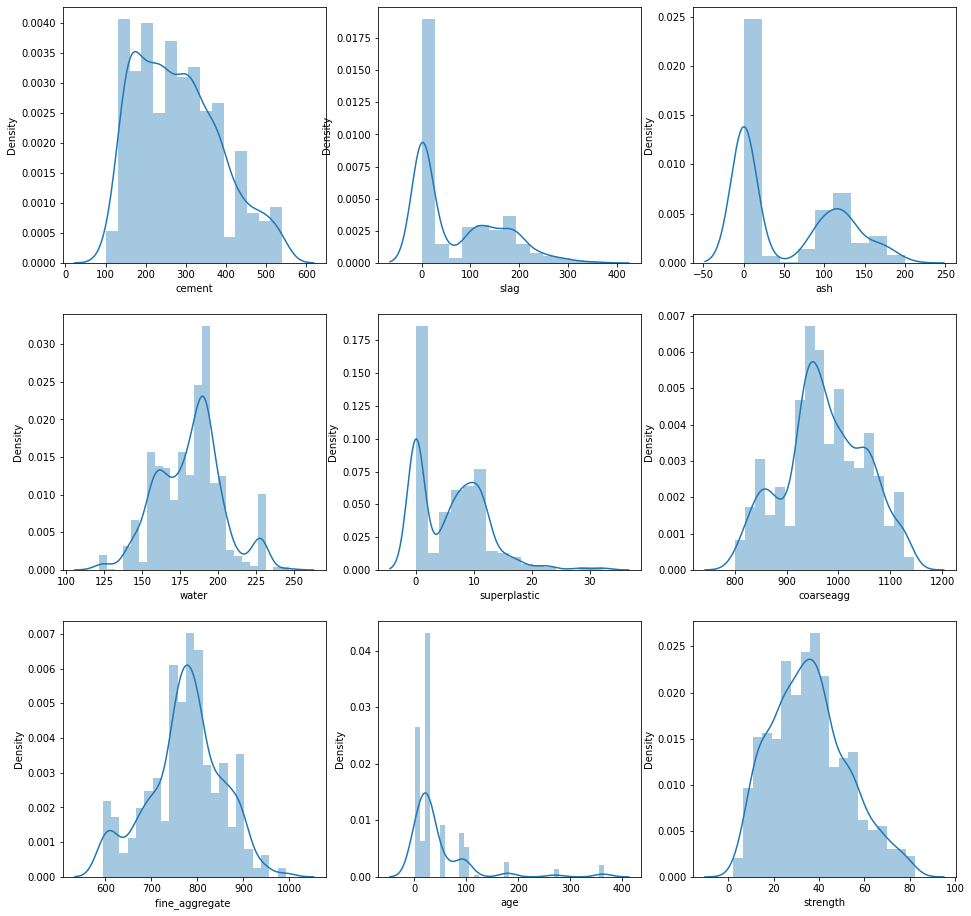

In [42]:
fig, ax2 = plt.subplots(3, 3, figsize = (16, 16))
sns.distplot(data['cement'], ax = ax2[0][0])
sns.distplot(data['slag'], ax = ax2[0][1])
sns.distplot(data['ash'], ax = ax2[0][2])
sns.distplot(data['water'], ax = ax2[1][0])
sns.distplot(data['superplastic'], ax = ax2[1][1])
sns.distplot(data['coarseagg'], ax = ax2[1][2])
sns.distplot(data['fine_aggregate '], ax = ax2[2][0])
sns.distplot(data['age'], ax = ax2[2][1])
sns.distplot(data['strength'], ax = ax2[2][2])

<AxesSubplot:>

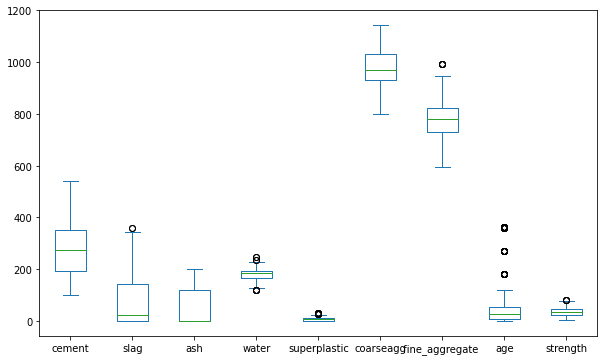

In [43]:
data.plot(kind = 'box', figsize = (10,6))

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fine_aggregate '}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

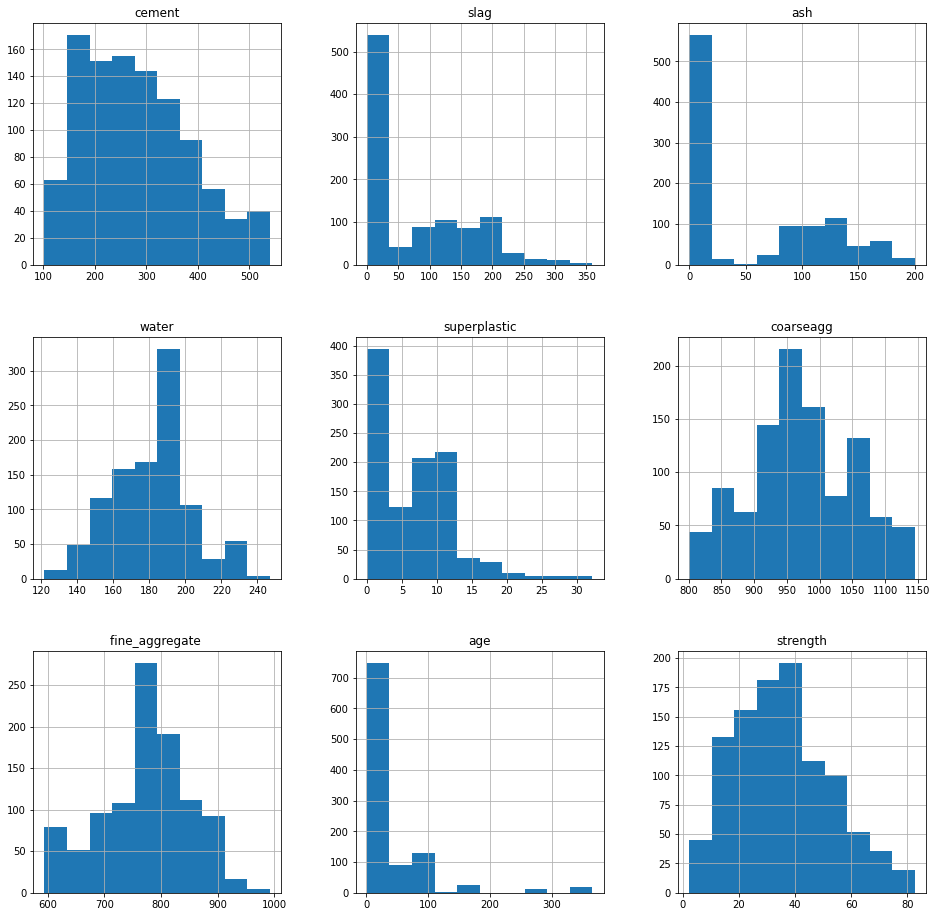

In [44]:
data.hist(figsize = (16, 16))

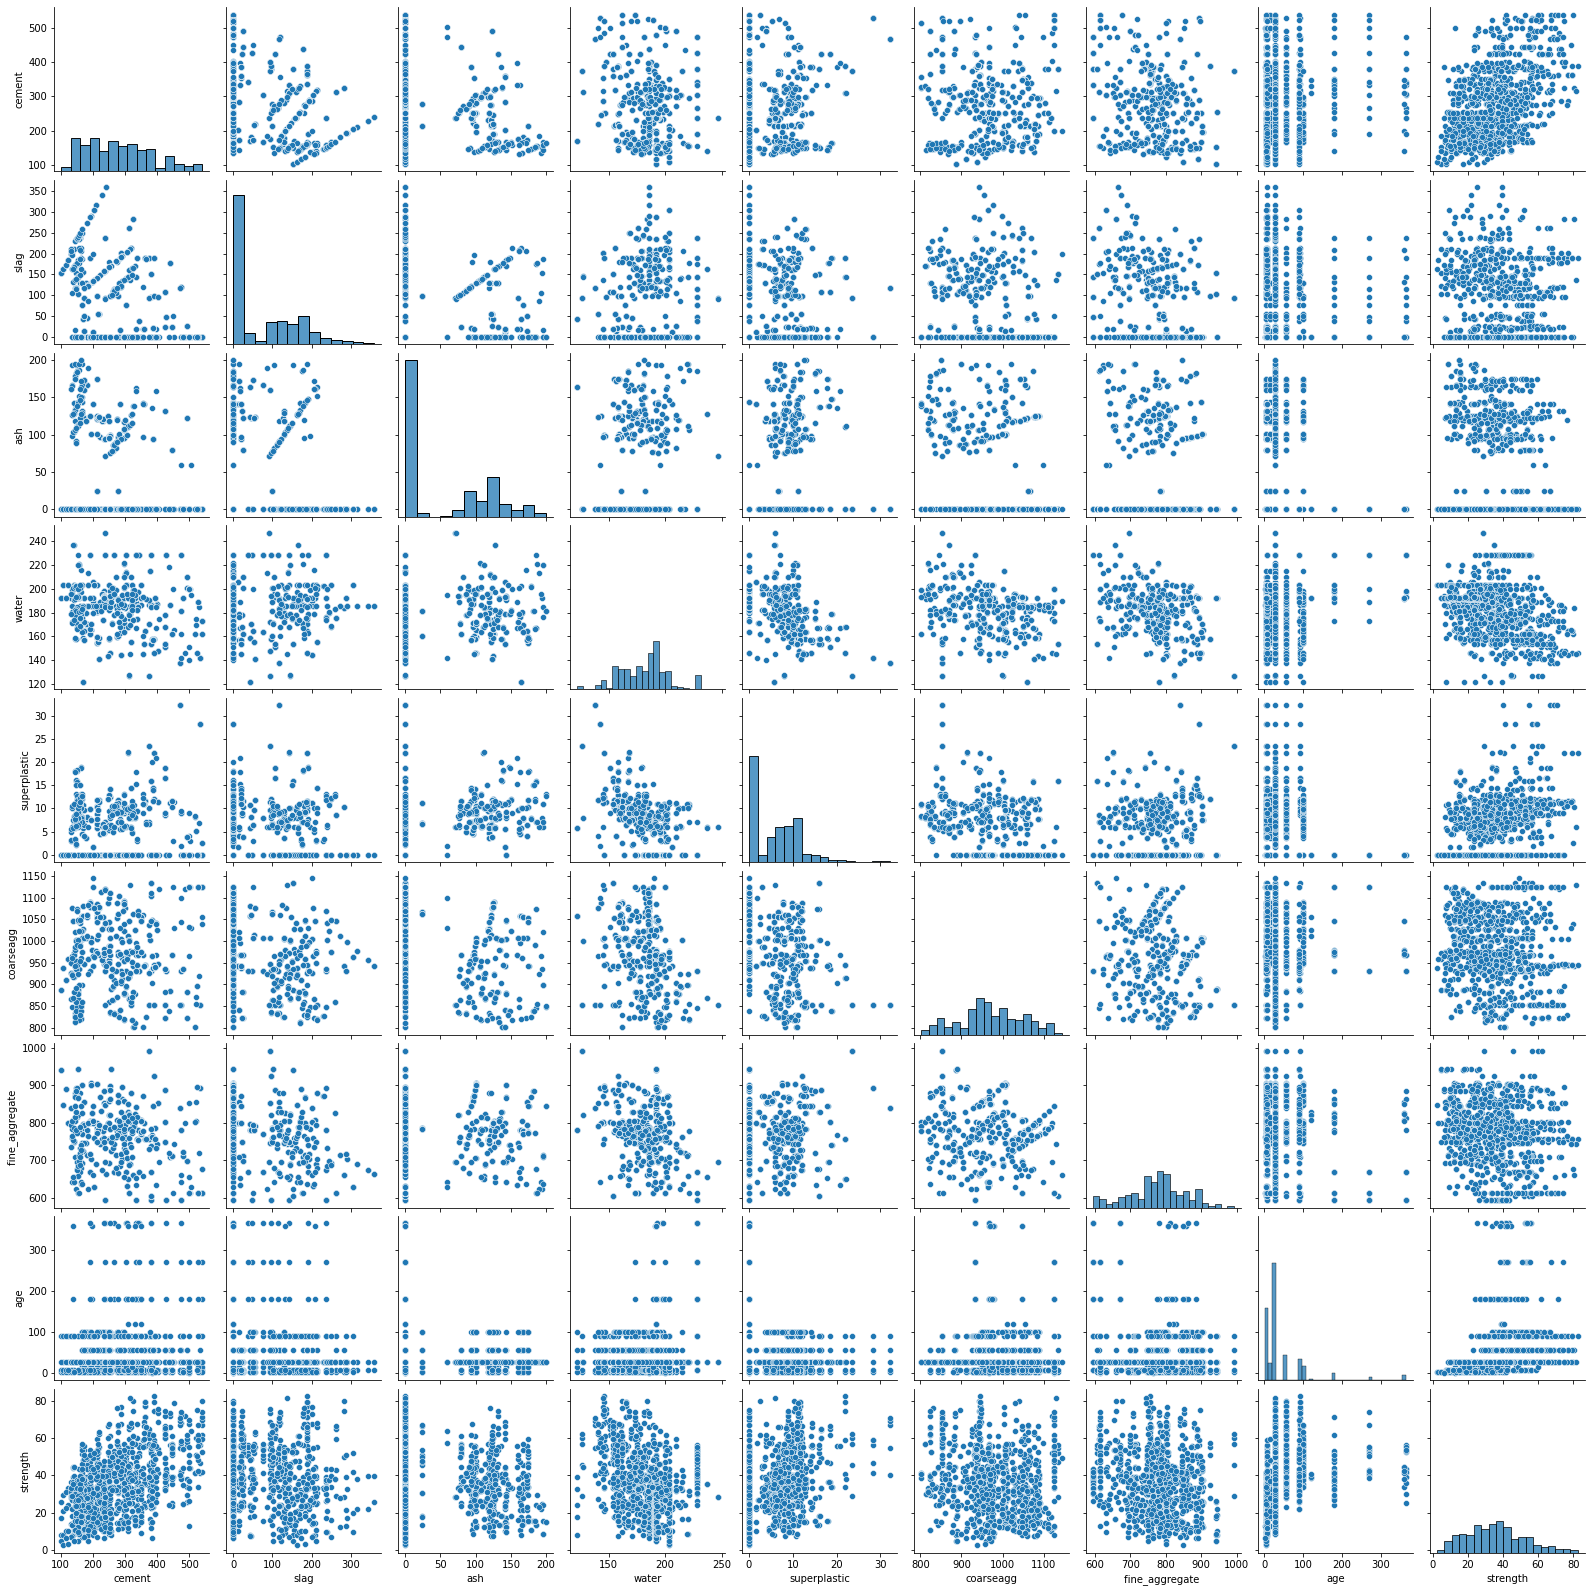

In [45]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(data)

**Diagonal Analysis :** The diagonal gives the same information, we got using distplot.



* Cement attribute have almost normal curve.
* Slag has two gausssians and rightly skewed.It shows the presence of outlies.
* Ash has two gaussians and rightly skewed.It shows the presence of outlies.
* Water has atleast guassians and slighly left skewed.It shows the presence of outlies.
* Superplasticizer has multiple gaussians and rightly skewed.It shows the presence of outlies.
* Coarse Aggregate has three guassians and almost normal.
* Fine Aggregate has almost two guassians and looks like normal.
* Age has multiple guassians and rightly skewed. It shows the presence of outlies.
* Strength is close to a normal curve.
* **We not only have missing values problem but also outliers problem in the dataset.**


Strength attribute : Relationship between dependent and independent attributes.

Strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

* Strength vs Cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor. 
* Strength vs Slag : There is no particular trend. 
* Strength vs Ash: There is also no particular trend. 
* Strength vs Superplasticizer : For a given value of age, we have different values of strength. Hence, It is not a good predictor. 
* Strength vs Age:For a given value of age, we have different values of strength. Hence, It is not a good predictor. 
* Similarly, other attributes does not give any strong relationship with Strength. 
* Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. 
* There is a no linear relationship between them.

So, we will not use Linear model which will be a vain.

The correlation value between the attributes which is depicted through hetmaps.

In [46]:
# correlation
data.corr(method='pearson')

,cement,slag,ash,water,superplastic,coarseagg,fine_aggregate,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Alternate representation of correlation of data i.e., heat maps

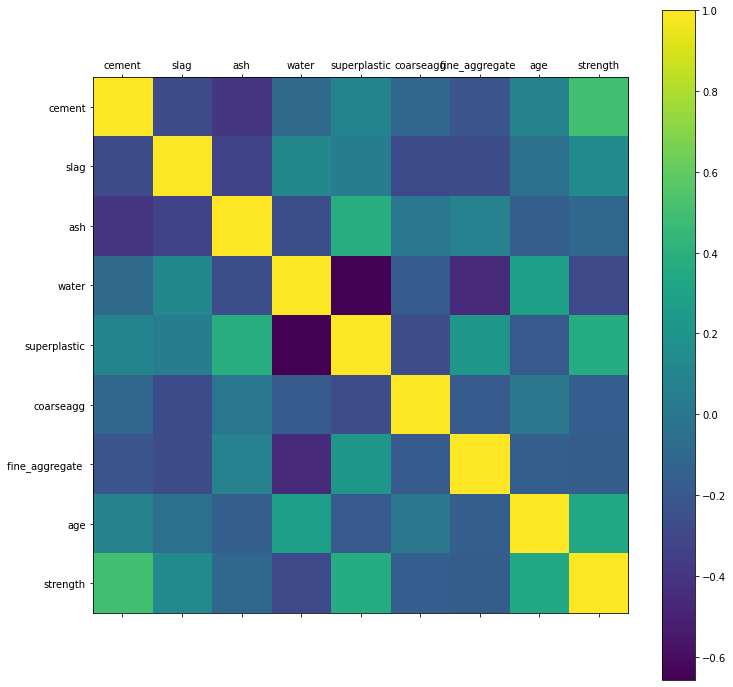

In [47]:
# heat map
rcParams['figure.figsize'] = 20,12
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

**Observation**

* It is also giving the same information we observed in pairplot analysis.
* Water shows significant negative relationship with Superplastic and Fineagg. It also shows some kind of positive relationship with Slag and Age.

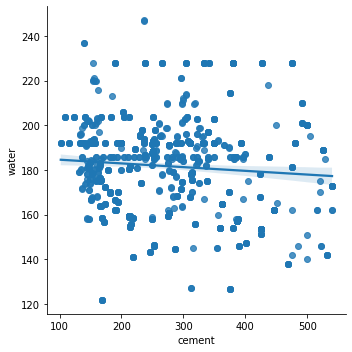

In [48]:
sns.lmplot(x = 'cement', y = 'water', data = data)

In [49]:
print('Mean amount of cement used ', data['cement'].mean(), 'kg in a m3 mixture')
print('Mean amount of slag used ', data['slag'].mean(), 'kg in a m3 mixture')
print('Mean amount of ash used ', data['ash'].mean(), 'kg in a m3 mixture')
print('Mean amount of water used ', data['water'].mean(), 'kg in a m3 mixture')
print('Mean amount of superplastic used ', data['superplastic'].mean(), 'kg in a m3 mixture')
print('Mean amount of coarseagg used ', data['coarseagg'].mean(), 'kg in a m3 mixture')
print('Mean amount of fine_aggregate used ', data['fine_aggregate '].mean(), 'kg in a m3 mixture')

Mean amount of cement used  281.16786407766995 kg in a m3 mixture
Mean amount of slag used  73.89582524271846 kg in a m3 mixture
Mean amount of ash used  54.18834951456311 kg in a m3 mixture
Mean amount of water used  181.56728155339806 kg in a m3 mixture
Mean amount of superplastic used  6.204660194174758 kg in a m3 mixture
Mean amount of coarseagg used  972.9189320388349 kg in a m3 mixture
Mean amount of fine_aggregate used  773.5804854368932 kg in a m3 mixture


**HANDLING MISSING VALUES & OUTLIERS**

In [50]:
data.isnull().sum()

cement             0
slag               0
ash                0
water              0
superplastic       0
coarseagg          0
fine_aggregate     0
age                0
strength           0
dtype: int64

**Observation :**

In the data, there are no missing values in any columns of the data.

<AxesSubplot:>

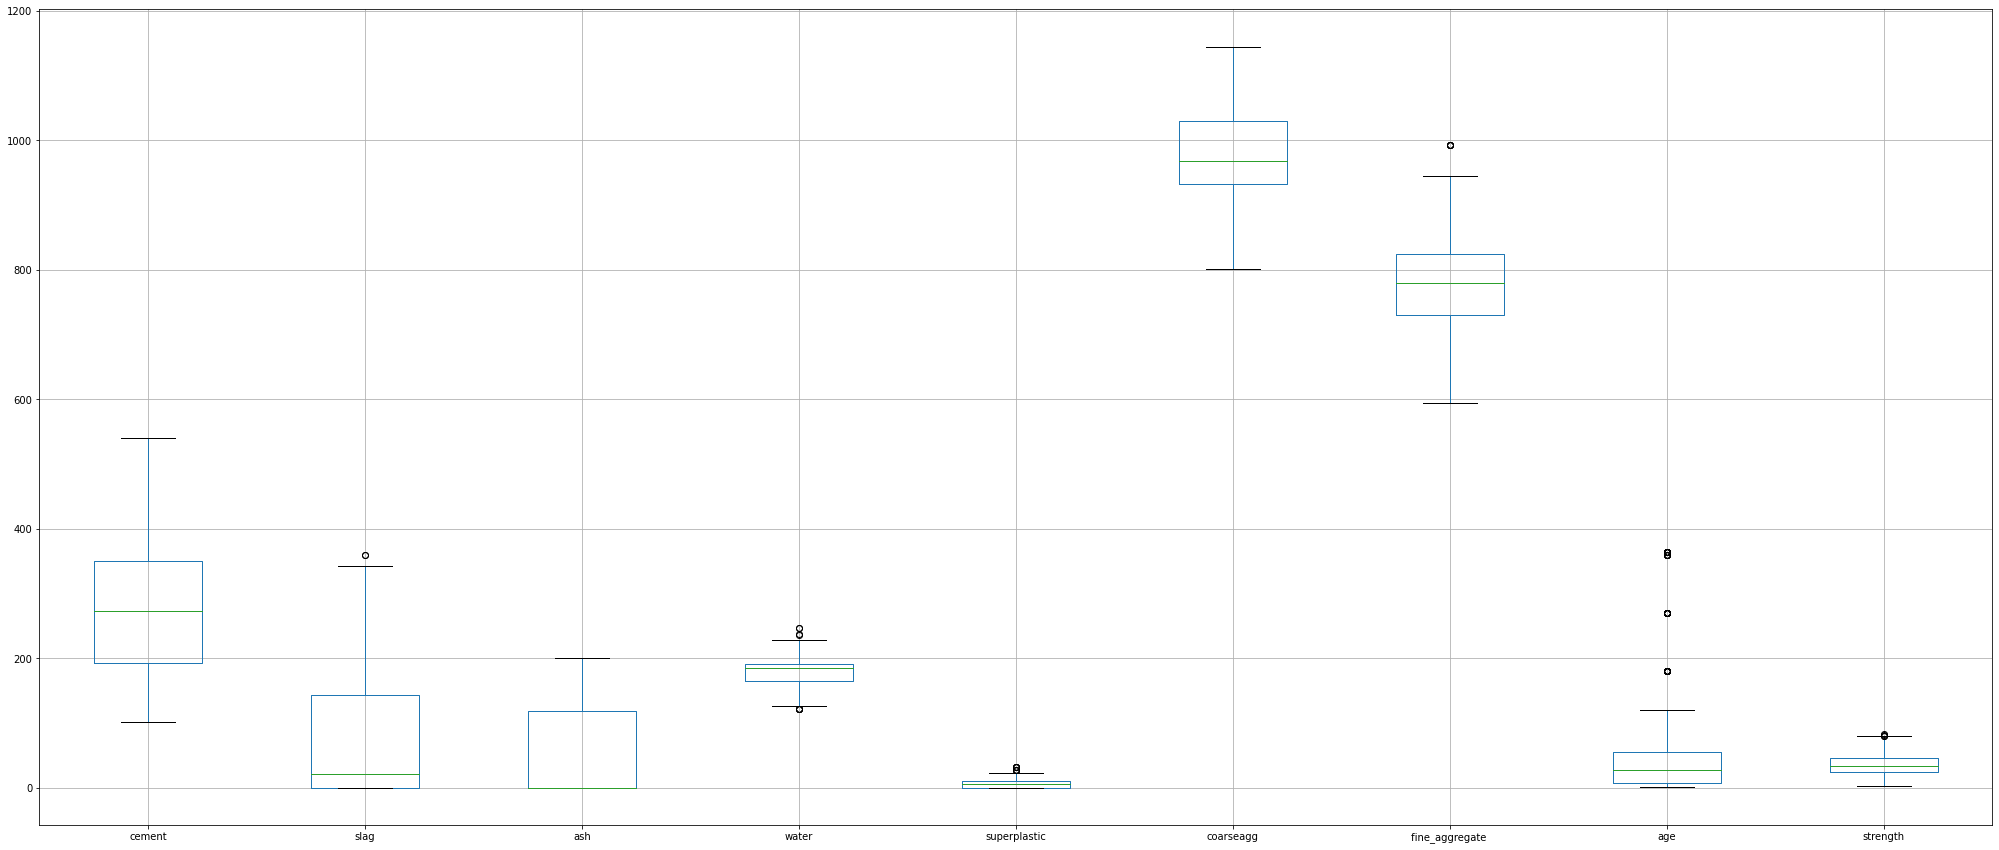

In [51]:
data1 = data.copy()
data1.boxplot(figsize = (35,15))

**Observation :**

It is observed that Slag, Ash, Water, Superplasticizer and Age contains Outliers.

Here it is considered that the Data points which are more than 2.5 times that of standard deviation are considered as Outliers. 

Calculation of number of Outliers in the data is obtained as follows:

In [52]:
print('No of outliers in cement :',data1[((data1.cement - data1.cement.mean())/data1.cement.std()).abs() > 2.5]['cement'].count())
print('No of outliers in slag :',data1[((data1.slag - data1.slag.mean())/data1.slag.std()).abs() > 2.5]['slag'].count())
print('No of outliers in ash :',data1[((data1.ash - data1.ash.mean())/data1.ash.std()).abs() > 2.5]['ash'].count())
print('No of outliers in water :',data1[((data1.water - data1.water.mean())/data1.water.std()).abs() > 2.5]['water'].count())
print('No of outliers in superplastic :',data1[((data1.superplastic - data1.superplastic.mean())/data1.superplastic.std()).abs() > 2.5]['superplastic'].count())
print('No of outliers in coarseagg :',data1[((data1.coarseagg - data1.coarseagg.mean())/data1.coarseagg.std()).abs() > 2.5]['coarseagg'].count())
print('No of outliers in age :',data1[((data1.age - data1.age.mean())/data1.age.std()).abs() > 2.5]['age'].count())

No of outliers in cement : 0
No of outliers in slag : 12
No of outliers in ash : 0
No of outliers in water : 16
No of outliers in superplastic : 22
No of outliers in coarseagg : 0
No of outliers in age : 33


Determination of Outliers in Slag :

In [53]:
print('Outliers in slag :\n' ,data1[((data1.slag - data1.slag.mean())/data1.slag.std()).abs() > 2.5]['slag'])

Outliers in slag :
 553    359.4
556    290.2
559    359.4
563    316.1
571    342.1
578    290.2
583    316.1
584    342.1
645    305.3
698    305.3
699    305.3
720    305.3
Name: slag, dtype: float64


Determination of Outliers in Water :

In [54]:
print('Outliers in water :\n' ,data1[((data1.water - data1.water.mean())/data1.water.std()).abs() > 2.5]['water'])

Outliers in water :
 74      126.6
97      126.6
120     126.6
143     126.6
166     126.6
224     121.8
225     121.8
226     121.8
227     121.8
228     121.8
862     237.0
873     247.0
908     127.0
936     246.9
971     127.3
1019    236.7
Name: water, dtype: float64


Determination of Outliers in Superplasticizer :

In [55]:
print('Outliers in superplastic :\n' ,data1[((data1.superplastic - data1.superplastic.mean())/data1.superplastic.std()).abs() > 2.5]['superplastic'])

Outliers in superplastic :
 74     23.4
76     32.2
79     28.2
90     22.0
97     23.4
99     32.2
102    28.2
113    22.0
120    23.4
122    32.2
125    28.2
136    22.0
143    23.4
145    32.2
148    28.2
159    22.0
166    23.4
168    32.2
171    28.2
181    22.0
834    22.0
991    22.1
Name: superplastic, dtype: float64


Determination of Outliers in Age :

In [56]:
print('Outliers in age :\n' ,data1[((data1.age - data1.age.mean())/data1.age.std()).abs() > 2.5]['age'])

Outliers in age :
 2      270
3      365
4      360
6      365
12     270
17     365
24     365
25     270
26     270
30     365
31     365
33     270
34     365
35     270
41     365
42     365
56     365
60     270
61     270
63     270
65     270
66     360
604    365
610    365
616    360
620    365
622    365
756    270
769    360
792    360
798    270
814    360
820    270
Name: age, dtype: int64


Replacing each and every Outlier of the data with the median of the respective column of the data.

In [57]:
for col_name in data1.columns[:-1]:
  q1 = data1[col_name].quantile(0.25)
  q3 = data1[col_name].quantile(0.75)
  iqr = q3 - q1

  low = q1 - 1.25 * iqr
  high = q3 + 1.25 * iqr
  data1.loc[(data1[col_name] < low) | (data1[col_name] > high), col_name] = data1[col_name].median()

<AxesSubplot:>

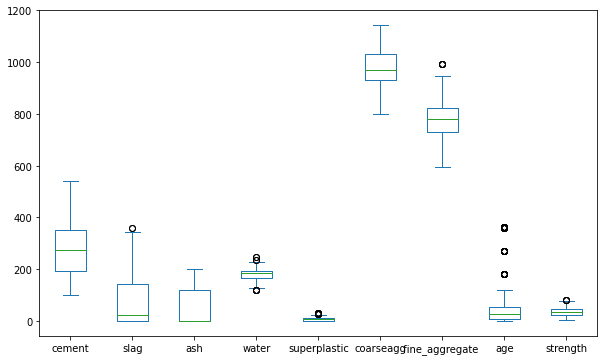

In [58]:
data.plot(kind = 'box', figsize = (10,6))

After removing all the Outliers in the data, whisker plot looks like as follows: 

<AxesSubplot:>

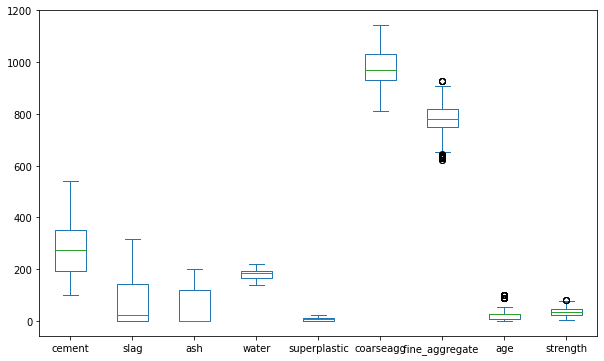

In [59]:
data1.plot(kind = 'box', figsize = (10,6))

**MODEL DEVELOPMENT**

Model selection in Machine Learning which refers to the process of choosing the best model that fits the data at the best for a given problem. This is an important step in the machine learning process as the choice of model can have a significant impact on the performance of the system. Model selection involves comparision of different models based on multiple criterion, such as accuracy, computational complexity, and interpretability, to find the one that best fits the problem at the end.

The choice of model depends on several factors, including the type of data, the nature of the problem, and the desired level of accuracy. Some common models used in machine learning include LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, Neural Networks.



Iteration - 1


Considering all the involved data columns that are prescribed in the dataframe whether they are Importance or not.

In [60]:
X = data.drop(columns = ['strength'])
Y = data.strength

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score

In [63]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
adr = AdaBoostRegressor()

In [64]:
model_dict = {'lr' : lr, 
              'dtr' : dtr, 
              'svr' : svr, 
              'rfr' : rfr,
              'gbr' : gbr,
              'adr' : adr}

In [65]:
values = []
names = []
def model_train_output(name, model, X_train, X_test, Y_train, Y_test):
  model.fit(X_train,Y_train)
  y_predict = model.predict(X_test)
  test_data_accuracy = r2_score(Y_test, y_predict)
  names.append(name)
  values.append(test_data_accuracy)

  return names, values

In [66]:
for name, model in model_dict.items():
  names, test_accuracy = model_train_output(name, model, X_train, X_test, Y_train, Y_test)

In [67]:
df = pd.DataFrame(names, columns = ['Model'])
df['test_accuracy'] = test_accuracy

In [68]:
df

,Model,test_accuracy
0,lr,0.521013
1,dtr,0.853121
2,svr,0.215525
3,rfr,0.898332
4,gbr,0.885710
5,adr,0.766859


Finding the Importance of each parameter on the target parameter.

In [69]:
dtr.fit(X, Y)
print('Feature Importances : \n', pd.DataFrame(dtr.feature_importances_, columns = ['Importance'], index = X.columns))

Feature Importances : 
                  Importance
cement             0.364091
slag               0.110132
ash                0.011052
water              0.111082
superplastic       0.027457
coarseagg          0.030579
fine_aggregate     0.023511
age                0.322095


Iteration - 2

Dropping the least effect parameters on the target parameter

In [70]:
X1 = data.drop(['strength', 'ash', 'superplastic', 'coarseagg', 'fine_aggregate '], axis = 1)
Y1 = data['strength']

In [71]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 1)

In [72]:
values = []
names = []
def model_train_output(name, model, X_train, X_test, Y_train, Y_test):
  model.fit(X_train,Y_train)
  y_predict = model.predict(X_test)
  test_data_accuracy = r2_score(Y_test, y_predict)
  names.append(name)
  values.append(test_data_accuracy)

  return names, values

In [73]:
for name, model in model_dict.items():
  names, test_accuracy1 = model_train_output(name, model, X_train1, X_test1, Y_train1, Y_test1)

In [74]:
df['test_accuracy1'] = test_accuracy1

In [75]:
df

,Model,test_accuracy,test_accuracy1
0,lr,0.521013,0.523563
1,dtr,0.853121,0.852938
2,svr,0.215525,0.557939
3,rfr,0.898332,0.885621
4,gbr,0.885710,0.860567
5,adr,0.766859,0.756782


test_accuracy ---> Accuracy of the model by considering all the parameters of the given data of testing data

test_accuracy1 ---> Accuracy of the model by considering only the effective parameters of the given data of testing data

**Observation :**

Random Forest Regressor and Gradient Boosting Regressor are best performing models. However, on removing the least effective parameters, accuracy has dropped.

**Hyper Parameter Tuning**

The model selection process often involves tuning the parameters of each model to find the best combination that yields the highest performance. This is known as hyperparameter tuning and can be done using techniques such as grid search, random search, and Bayesian optimization.

In [76]:
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()

Gradient Boosting Regressor

In [77]:
params = {
    'learning_rate' : [0.01, 0.1],
    'n_estimators' : [200, 300, 500],
    'max_depth' : [3, 4, 5]
}

clf = GridSearchCV(gbr1, params, cv = 10, n_jobs = -1, verbose = 2, scoring = 'r2')
clf.fit(X_train, Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [200, 300, 500]},
             scoring='r2', verbose=2)

In [78]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [79]:
clf.best_score_

0.935315932403259

On Hyper Tuning the data on Gradient Boosting Regressor, the Accuracy has improved from *0.885710*	to *0.935315*

Random Forest Regressor

In [80]:
params = {
    'n_estimators' : [150, 200, 250, 300, 400, 500]
}

clf = GridSearchCV(rfr1, params, cv = 10, n_jobs = -1, verbose = 2, scoring = 'r2')
clf.fit(X_train, Y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [150, 200, 250, 300, 400, 500]},
             scoring='r2', verbose=2)

In [81]:
clf.best_params_

{'n_estimators': 250}

In [82]:
clf.best_score_

0.9071170162155264

On Hyper Tuning the data on Random Forest Regressor, the Accuracy has improved 
from *0.898332* to *0.907117*

**Observation :**

On comparing the Accuracy of both the models after Hyper Tuning, 

**Best Model** ---> Gradient Boosting Regressor

In [83]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500)
gbr.fit(X_train, Y_train)
y_predict = gbr.predict(X_test)
r2_score(Y_test, y_predict)

0.9062126555122934

In [84]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500)
gbr.fit(X_train, Y_train)
y_predict1 = gbr.predict(X_train)
r2_score(Y_train, y_predict1)

0.9863700471556958

In [85]:
print('Accuracy on test data:', r2_score(Y_test, y_predict))
print('Accuracy on train data: ', r2_score(Y_train, y_predict1) )

Accuracy on test data: 0.9062126555122934
Accuracy on train data:  0.9863700471556958


**Building a Predective System**

Using Gradient Boosing Regressor


In [86]:
input_data = (198, 132, 0, 192, 0, 978, 825, 90)

# change the input_data to numpy array
input_data_as_numpy = np.asarray(input_data)

# reshape the numpy array as prediction is for only one instance
input_data_reshaped = input_data_as_numpy.reshape(1, -1)

# prediction
prediction_of_input_data = gbr.predict(input_data_reshaped);

In [87]:
print(prediction_of_input_data)

[39.54313116]


In [88]:
print('Compressive Strength of Concrete is {:.2f} MPa'.format(prediction_of_input_data[0]))

Compressive Strength of Concrete is 39.54 MPa


**CONCLUSION**

In this project, Machine Learning is used to predict the Compressive Strength of Concrete upon supplying the composition of components. After importing the data, analysed it using plots. Then applied Machine Learning algorithms like, LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor. And varied parameters across the model to improve their scores. In the end, acheived maximum accuracy of about 90% on test data by using Gradient Boosting Regressor.